In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/jason.csv',index_col = [0])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,...,review_lower,date,word_count,sentiment_m,cost_m,efficient_m,effective_m,ease of use_m,max,align_type
163,Garden,1634,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-06-30T00:00:00,...,"good product, plants loved it",2021-06-30,5,Positive,0.014203,0.925289,0.996217,0.722218,0.996217,effective
164,Garden,1635,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-07-27T00:00:00,...,plants love this!,2021-07-27,3,Positive,0.021203,0.883600,0.993492,0.806547,0.993492,effective
165,Garden,1639,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-08-12T00:00:00,...,this molasses like ingredient is like super ju...,2021-08-12,61,Positive,0.654273,0.995972,0.999028,0.982616,0.999028,effective
166,Garden,1642,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-08-12T00:00:00,...,plants like it,2021-08-12,3,Positive,0.017564,0.669276,0.941303,0.737687,0.941303,effective
167,Garden,1655,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-09-08T00:00:00,...,very good,2021-09-08,2,Positive,0.337539,0.844368,0.991568,0.808757,0.991568,effective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,Garden,90673,Earth Juice Elements Cal-N-Mag,https://www.walmart.com//ip/Earth-Juice-Elemen...,Walmart,EarthJuice,103635752,103635752,No,2022-04-16T00:00:00,...,[this review was collected as part of a promot...,2022-04-16,150,Neutral,0.564089,0.794894,0.989510,0.647316,0.989510,effective
16462,Garden,110036,Earth Juice Grow Original Formula 1 Gallon,https://www.amazon.com/dp/B000E242UI,Amazon,EarthJuice,B000E242UI,B000E242UI,No,2022-05-01T00:00:00,...,ive been using earth juice as a regular fertil...,2022-05-01,26,Positive,0.201682,0.910727,0.994275,0.504554,0.994275,effective
24130,Garden,140060,Earth Juice Hi- Brix,https://www.amazon.com.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2022-06-07T00:00:00,...,"well, so i got this and it revitalizes a bunch...",2022-06-07,73,Positive,0.633386,0.506869,0.925474,0.093806,0.925474,effective
28118,Garden,150030,Earth Juice Hi- Brix,https://www.walmart.com//ip/Earth-Juice-Hi-Bri...,Walmart,EarthJuice,17694457,17694457,No,2022-05-23T00:00:00,...,earth juice company has been around a long tim...,2022-05-23,109,Positive,0.974401,0.982844,0.998425,0.729777,0.998425,effective


In [6]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df, values='max', index=['sentiment_m'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)
table_count

align_type,cost,ease of use,effective,All
sentiment_m,,,,
Negative,11,0,2,13
Neutral,0,0,5,5
Positive,1,1,57,59
All,12,1,64,77


In [7]:
#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)
table2

align_type,cost,ease of use,effective
sentiment_m,,,
Negative,92%,0%,3%
Neutral,0%,0%,8%
Positive,8%,100%,89%


In [8]:
#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

#check results
results

array([['92%', '0%', '3%'],
       ['0%', '0%', '8%'],
       ['8%', '100%', '89%']], dtype=object)

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

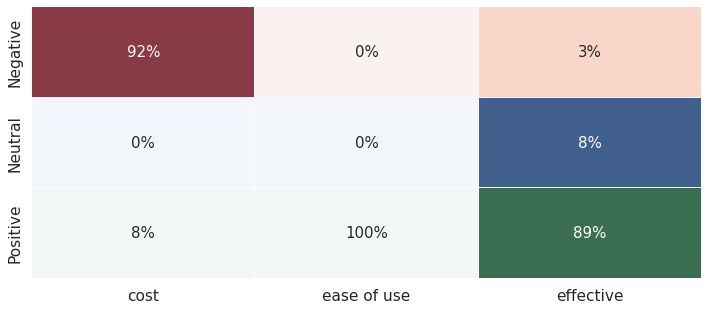

In [9]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

**Tree Map**

In [10]:
# Treemap
from collections import defaultdict
import plotly
import plotly.express as px

data =  pd.DataFrame.from_dict(df)
fig = px.treemap(data, path=['sentiment_m', 'align_type'])

fig.data[0].textinfo = 'label+text+value'
fig.data[0]['textfont']['color'] = "white"
fig.data[0]['textfont']['size'] = 15
fig.data[0].textposition = 'middle center'

fig.layout.hovermode = False

fig.show()

**For 5 start rating reviews**

In [11]:
df_5 = df[df['rating'] == 5]

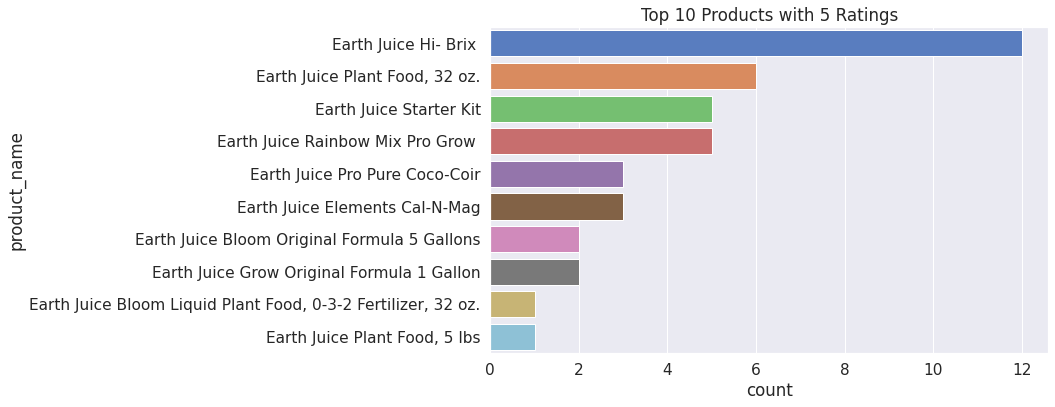

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 5 Ratings');
sns.countplot(y = 'product_name', data = df_5, order = df_5['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

**N-Gram**

In [13]:
from google.colab import files
src = list(files.upload().values())[0]
open('helper_functions.py','wb').write(src)
import helper_functions

Saving helper_functions.py to helper_functions.py


In [14]:
import helper_functions

In [15]:
!pip install transformers
from transformers import pipeline
from helper_functions import *

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 53.8 MB/s 
     |████████████████████████████████| 163 kB 58.1 MB/s 


In [16]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [17]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_5["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

**Heatmap**

In [18]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_5, values='max', index=['sentiment_m'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

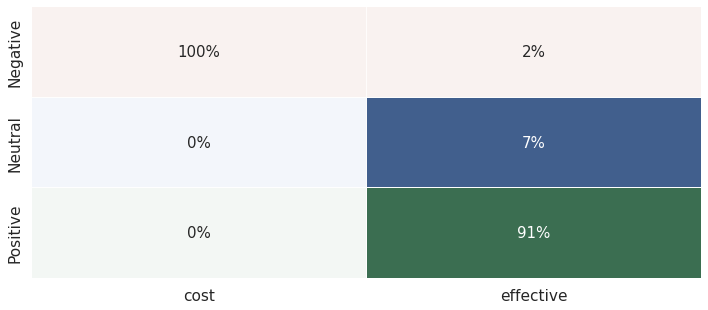

In [19]:
## Heatmap
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

**For 1 Star Review**

In [20]:
df_1 = df[df['rating'] == 1]

Text(0.5, 1.0, 'Top 10 Products with 1 Ratings')

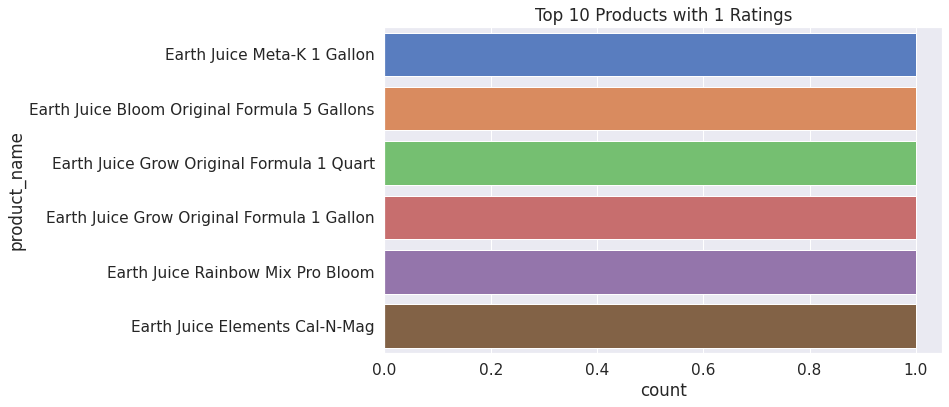

In [21]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 1 Ratings');
sns.countplot(y = 'product_name', data = df_1, order = df_1['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

In [22]:
## Get the bar chart from 1 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_1["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

In [23]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_1, values='max', index=['sentiment_m'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)
table_count.loc['Neutral'] = 0
table2.loc['Neutral'] = "{0:.0%}".format(0)

table_count=table_count.reindex(['Negative','Neutral','Positive'])
table2=table2.reindex(['Negative','Neutral','Positive'])
#reshape results
results=np.asarray(table2)


<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

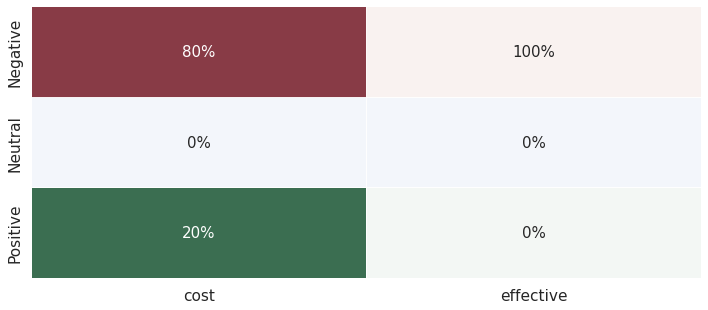

In [24]:
## Heatmap
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

In [29]:
df.to_csv('insight_earthjuice.csv')